## Spot finding for applying BF correction

Author: Craig Lage  
Date: 2018-09-18

#### Abstract

Learning how to analyze images of spots in preparation for applying BF correction.


In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage
from pylab import *
import glob, time
%matplotlib inline

In [2]:
from lsst.daf.persistence import Butler
butler = Butler('spots_repo_2')

In [3]:
exposure = butler.get('raw', dataId={'visit': 328, 'detector':85})

In [4]:
from lsst.ip.isr.isrTask import IsrTask, IsrTaskConfig
isrConfig = IsrTaskConfig()
isrConfig.doBias = False
isrConfig.doDark = False
isrConfig.doFlat = False
isrConfig.doFringe = False
isrConfig.doDefect = False
isrConfig.doAddDistortionModel = False
isrConfig.doWrite = False
isrConfig.doAssembleCcd = True
isrConfig.expectWcs = False
isrConfig.doLinearize = False
isrTask = IsrTask(config=isrConfig)
testisr = isrTask.run(exposure)
print(testisr.exposure.image.array.shape)

(4000, 4072)


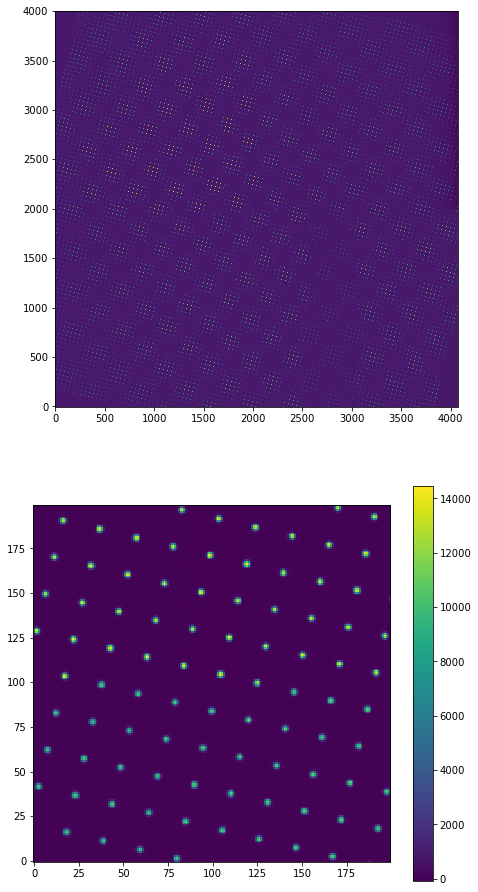

In [5]:
figure(figsize=(8,16))
plt.subplot(2,1,1)
plt.imshow(testisr.exposure.image.array,origin='lower')
plt.subplot(2,1,2)
plt.imshow(testisr.exposure.image.array[1900:2100,900:1100],origin='lower')
colorbar()

Characterization took  673.  seconds
Detected  34594  objects 


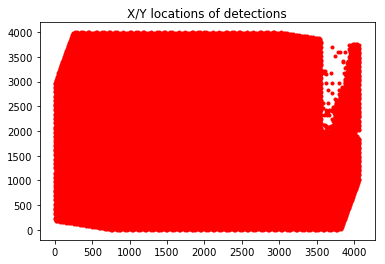

In [6]:
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask, CharacterizeImageConfig

charConfig = CharacterizeImageConfig()
charConfig.installSimplePsf.fwhm = .2
charConfig.doMeasurePsf = False
charConfig.doApCorr = False
charConfig.repair.doCosmicRay = False  
charConfig.detection.background.binSize = 10 
charConfig.detection.minPixels = 5
charTask = CharacterizeImageTask(config=charConfig)
tstart=time.time()
charResult = charTask.characterize(testisr.exposure) # charTask.run(exposure) stack v16.0+22
print("Characterization took ",str(time.time()-tstart)[:4]," seconds")
print("Detected ",len(charResult.sourceCat)," objects ")

plt.title('X/Y locations of detections')
plt.plot(charResult.sourceCat['base_SdssCentroid_x'],charResult.sourceCat['base_SdssCentroid_y'],'r.')